# Часть 0

In [26]:
import random
import numpy.random as rnd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from IPython.display import display

class FunctionWrapper:
    def __init__(self, name, f, a, b, e, der):
        self.f = f # function
        self.der = der # deriative
        self.a = a # bounds
        self.b = b #
        self.e = e # accuracy
        self.name = name
    def __str__(self):
        return self.name + " on " + "[" + str(self.a) + ", " + str(self.b) + "]"
        
        
class OptimizeResult:
    def __init__(self, method_name, f: FunctionWrapper, iterations, calls, result, data):
        self.iterations  = iterations
        self.method_name = method_name
        self.f           = f
        self.calls       = calls
        self.result      = result
        self.data        = data
       
    def __str__(self):
        return "Result of " + self.method_name + " for {" + str(self.f) + "} is " + str(self.result)

# Часть 1: методы одномерного поиска

## Метод дихотомии

In [27]:
def dichotomy(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("dichotomy", w, 0, 0, 0, [])
    
    d = random.uniform(0.2, 1.0) * (w.e / 2)
    
    a = w.a
    b = w.b
    while (b - a > w.e):
        result.data.append((a, b))
        x1 = (a + b) / 2 - d
        x2 = (a + b) / 2 + d
        y1 = w.f(x1)
        y2 = w.f(x2)
        
        if (y1 < y2):
            b = x2
        elif (y2 < y1):
            a = x1
        else:
            a = x1
            b = x2
        
        result.iterations += 1
        result.calls += 2

    result.result = (a + b) / 2
    return result

## Метод золотого сечения

In [28]:
def golden_ratio(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("golden ratio", w, 0, 0, 0, [])
    
    a = w.a
    b = w.b
    if (b - a < w.e):
        result.result = (a + b) / 2
        return result
    
    gr = (math.sqrt(5) + 1) / 2
    
    x1 = b - (b - a) / gr
    x2 = a + (b - a) / gr

    y1 = w.f(x1)
    y2 = w.f(x2)
    result.calls += 2

    while (b - a > w.e):
        result.data.append((a, b))
        if (y1 < y2):
            b = x2
            (x2, y2) = (x1, y1)
            x1 = b - (b - a) / gr
            y1 = w.f(x1)
        else:
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + (b - a) / gr
            y2 = w.f(x2)
        
        result.iterations += 1
        result.calls += 1

    result.result = (a + b) / 2
    return result

## Метод Фибоначчи

In [29]:
def fibonacci(w: FunctionWrapper) -> OptimizeResult:
    def fib(i):
        (a, b) = (0, 1)
        for j in range(0, i):
            temp = b
            b += a
            a = temp
        return a
    def fib_greater(t):
        (a, b) = (0, 1)
        j = 0
        while True:
            if a > t:
                return j - 2
            temp = b
            b += a
            a = temp
            j += 1

    calls = fib_greater((w.b - w.a) / w.e)
    result = OptimizeResult("fibonacci", w, 0, calls, 0, [])

    n = calls   
    x1 = w.a + (w.b - w.a) * (fib(n - 2) / fib(n))
    x2 = w.a + (w.b - w.a) * (fib(n - 1) / fib(n))
    y1 = w.f(x1)
    y2 = w.f(x2)
    a = w.a
    b = w.b
    
    while (n > 1):
        result.data.append((a, b))
        result.iterations += 1
        n -= 1
        if (y1 > y2):
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + b - x1
            y2 = w.f(x2)
        else:
            b = x2
            (x2, y2) = (x1, y1)
            x1 = a + b - x2
            y1 = w.f(x1)

    result.result = (x1 + x2) / 2
    return result

## Test

In [30]:
for eps in [0.01, 0.0005, 0.00000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("(x + 1)^2 + 2", 
                        lambda x: (x + 1) ** 2 + 2, 
                        -100, 100, eps, None)

    print(dichotomy(f))
    print(golden_ratio(f))
    print(fibonacci(f))
    print()

Eps = 0.01
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.9979091817056311
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9957975517116466

Eps = 0.0005
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -1.0000025888991253
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -1.0004174769205463

Eps = 1e-08
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.99999997761468
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999999866804884
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999786485009068



## Report

In [31]:
def report1(w: FunctionWrapper):
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        res_d = dichotomy(w)
        res_g = golden_ratio(w)
        res_f = fibonacci(w)
        
        m = max(res_d.iterations, res_g.iterations, res_f.iterations)
        values = [["None", "None", "None"] for i in range(0, m)]
        
        for i in range(0, m):
            for a in [(0, res_d), (1, res_g), (2, res_f)]:
                (ind, d) = a
                if i < len(d.data):
                    values[i][ind] = str(d.data[i])
        print("EPS: " + str(eps))
        display(pd.DataFrame(values, columns = [
            res_d.method_name + " (calls: " + str(res_d.calls) + ")", 
            res_g.method_name + " (calls: " + str(res_g.calls) + ")", 
            res_f.method_name + " (calls: " + str(res_f.calls) + ")"
        ]))

In [32]:
report1(FunctionWrapper("(x + 1)^2 + 2", lambda x: (x + 1) ** 2 + 2, -100, 100, 0, None))

EPS: 0.1


,dichotomy (calls: 24),golden ratio (calls: 18),fibonacci (calls: 16)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.019323056983639172)","(-100, 23.606797749978966)","(-100, 23.60688956433637)"
2,"(-50.00966152849182, 0.019323056983639172)","(-52.78640450004205, 23.606797749978966)","(-52.78622087132726, 23.60688956433637)"
3,"(-25.01449229273773, 0.019323056983639172)","(-23.606797749978966, 23.606797749978966)","(-23.60688956433637, 23.60688956433637)"
4,"(-12.516907674860684, 0.019323056983639172)","(-23.606797749978966, 5.572809000084121)","(-23.60688956433637, 5.572441742654519)"
5,"(-6.268115365922162, 0.019323056983639172)","(-12.461179749810725, 5.572809000084121)","(-12.462006079027333, 5.572441742654519)"
6,"(-3.1437192114529005, 0.019323056983639172)","(-5.572809000084121, 5.572809000084121)","(-5.572441742654519, 5.572441742654519)"
7,"(-1.5815211342182698, 0.019323056983639172)","(-5.572809000084121, 1.3155617496424838)","(-5.572441742654519, 1.3171225937182953)"
8,"(-1.5815211342182698, -0.7617759816336762)","(-2.941685500799153, 1.3155617496424838)","(-2.938196555217928, 1.3171225937182953)"
9,"(-1.1909716149096121, -0.7617759816336762)","(-2.941685500799153, -0.31056200151418567)","(-2.938196555217928, -0.30395136778133747)"


EPS: 0.01


,dichotomy (calls: 34),golden ratio (calls: 23),fibonacci (calls: 21)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.0038467692670993924)","(-100, 23.606797749978966)","(-100, 23.6067970034716)"
2,"(-50.00192338463355, 0.0038467692670993924)","(-52.78640450004205, 23.606797749978966)","(-52.7864059930568, 23.6067970034716)"
3,"(-25.002885076950324, 0.0038467692670993924)","(-23.606797749978966, 23.606797749978966)","(-23.6067970034716, 23.6067970034716)"
4,"(-12.503365923108712, 0.0038467692670993924)","(-23.606797749978966, 5.572809000084121)","(-23.6067970034716, 5.5728119861136065)"
5,"(-6.2536063461879055, 0.0038467692670993924)","(-12.461179749810725, 5.572809000084121)","(-12.461173031244385, 5.5728119861136065)"
6,"(-3.1287265577275027, 0.0038467692670993924)","(-5.572809000084121, 5.572809000084121)","(-5.5728119861136065, 5.5728119861136065)"
7,"(-1.566286663497301, 0.0038467692670993924)","(-5.572809000084121, 1.3155617496424838)","(-5.5728119861136065, 1.3155490590171723)"
8,"(-1.566286663497301, -0.7773731778480014)","(-2.941685500799153, 1.3155617496424838)","(-2.941713868079262, 1.3155490590171723)"
9,"(-1.1756766899397506, -0.7773731778480014)","(-2.941685500799153, -0.31056200151418567)","(-2.941713868079262, -0.31061575004491715)"


EPS: 0.0001


,dichotomy (calls: 46),golden ratio (calls: 33),fibonacci (calls: 30)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 3.049856539400482e-05)","(-100, 23.606797749978966)","(-100, 23.60679775010817)"
2,"(-50.0000152492827, 3.049856539400482e-05)","(-52.78640450004205, 23.606797749978966)","(-52.78640449978366, 23.60679775010817)"
3,"(-25.000022873924046, 3.049856539400482e-05)","(-23.606797749978966, 23.606797749978966)","(-23.60679775010817, 23.60679775010817)"
4,"(-12.50002668624472, 3.049856539400482e-05)","(-23.606797749978966, 5.572809000084121)","(-23.60679775010817, 5.5728089995673145)"
5,"(-6.250028592405057, 3.049856539400482e-05)","(-12.461179749810725, 5.572809000084121)","(-12.461179750973542, 5.5728089995673145)"
6,"(-3.1250295454852255, 3.049856539400482e-05)","(-5.572809000084121, 5.572809000084121)","(-5.5728089995673145, 5.5728089995673145)"
7,"(-1.5625300220253098, 3.049856539400482e-05)","(-5.572809000084121, 1.3155617496424838)","(-5.5728089995673145, 1.3155617518389136)"
8,"(-1.5625300220253098, -0.7812192631645638)","(-2.941685500799153, 1.3155617496424838)","(-2.9416854958894874, 1.3155617518389136)"
9,"(-1.1719051411603307, -0.7812192631645638)","(-2.941685500799153, -0.31056200151418567)","(-2.9416854958894874, -0.31056199221166025)"


EPS: 1e-06


,dichotomy (calls: 64),golden ratio (calls: 42),fibonacci (calls: 40)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 4.7201053246354516e-07)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.00000023600527, 4.7201053246354516e-07)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004204, 23.60679774997898)"
3,"(-25.000000354007902, 4.7201053246354516e-07)","(-23.606797749978966, 23.606797749978966)","(-23.60679774997898, 23.60679774997898)"
4,"(-12.500000413009216, 4.7201053246354516e-07)","(-23.606797749978966, 5.572809000084121)","(-23.60679774997898, 5.572809000084078)"
5,"(-6.250000442509875, 4.7201053246354516e-07)","(-12.461179749810725, 5.572809000084121)","(-12.461179749810825, 5.572809000084078)"
6,"(-3.1250004572602035, 4.7201053246354516e-07)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084078, 5.572809000084078)"
7,"(-1.562500464635368, 4.7201053246354516e-07)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084078, 1.3155617496426686)"
8,"(-1.562500464635368, -0.7812495243018853)","(-2.941685500799153, 1.3155617496424838)","(-2.941685500798741, 1.3155617496426686)"
9,"(-1.171875466479159, -0.7812495243018853)","(-2.941685500799153, -0.31056200151418567)","(-2.941685500798741, -0.31056200151340363)"


EPS: 1e-07


,dichotomy (calls: 66),golden ratio (calls: 47),fibonacci (calls: 45)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 4.1538547565622037e-08)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.00000002076928, 4.1538547565622037e-08)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004205, 23.60679774997898)"
3,"(-25.000000031153913, 4.1538547565622037e-08)","(-23.606797749978966, 23.606797749978966)","(-23.606797749978966, 23.60679774997898)"
4,"(-12.50000003634623, 4.1538547565622037e-08)","(-23.606797749978966, 5.572809000084121)","(-23.606797749978966, 5.572809000084121)"
5,"(-6.250000038942389, 4.1538547565622037e-08)","(-12.461179749810725, 5.572809000084121)","(-12.46117974981074, 5.572809000084121)"
6,"(-3.1250000402404683, 4.1538547565622037e-08)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084106, 5.572809000084121)"
7,"(-1.5625000408895078, 4.1538547565622037e-08)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084106, 1.3155617496425265)"
8,"(-1.5625000408895078, -0.7812499581369325)","(-2.941685500799153, 1.3155617496424838)","(-2.9416855007990677, 1.3155617496425265)"
9,"(-1.1718750410517675, -0.7812499581369325)","(-2.941685500799153, -0.31056200151418567)","(-2.9416855007990677, -0.3105620015140289)"


In [33]:
report1(FunctionWrapper("(x - 1)^2 - 1", lambda x: x ** 4 - 1, -100, 1000, 0, None))

EPS: 0.1


,dichotomy (calls: 30),golden ratio (calls: 22),fibonacci (calls: 20)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.03132303296064)","(-100, 579.8373876248843)","(-100, 579.8373983739838)"
2,"(-100, 175.04698454944094)","(-100, 320.1626123751157)","(-100, 320.1626016260162)"
3,"(-100, 37.55481530768109)","(-100, 159.6747752497687)","(-100, 159.67479674796755)"
4,"(-31.253915379120077, 37.55481530768109)","(-100, 60.48783712534703)","(-100, 60.48780487804868)"
5,"(-31.253915379120077, 3.181772997241128)","(-38.699100999074645, 60.48783712534703)","(-38.69918699187019, 60.48780487804868)"
6,"(-14.067394223900095, 3.181772997241128)","(-38.699100999074645, 22.601798001850696)","(-38.69918699187019, 22.601626016259615)"
7,"(-5.474133646290106, 3.181772997241128)","(-15.284241121645636, 22.601798001850696)","(-15.284552845529447, 22.601626016259615)"
8,"(-1.177503357485111, 3.181772997241128)","(-15.284241121645636, 8.13061875578337)","(-15.284552845529447, 8.130081300811298)"
9,"(-1.177503357485111, 1.0334578528386305)","(-6.340560490283952, 8.13061875578337)","(-6.341463414637019, 8.130081300811298)"


EPS: 0.01


,dichotomy (calls: 38),golden ratio (calls: 27),fibonacci (calls: 24)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0030874002272)","(-100, 579.8373876248843)","(-100, 579.8373878536921)"
2,"(-100, 175.00463110034073)","(-100, 320.1626123751157)","(-100, 320.16261214630777)"
3,"(-100, 37.50540295039752)","(-100, 159.6747752497687)","(-100, 159.67477570738436)"
4,"(-31.25038592502839, 37.50540295039752)","(-100, 60.48783712534703)","(-100, 60.48783643892341)"
5,"(-31.25038592502839, 3.1305959129117134)","(-38.699100999074645, 60.48783712534703)","(-38.69910282953754, 60.48783643892341)"
6,"(-14.062982406285489, 3.1305959129117134)","(-38.699100999074645, 22.601798001850696)","(-38.69910282953754, 22.601794340924926)"
7,"(-5.469280646914037, 3.1305959129117134)","(-15.284241121645636, 22.601798001850696)","(-15.284247757073558, 22.601794340924926)"
8,"(-1.1724297672283115, 3.1305959129117134)","(-15.284241121645636, 8.13061875578337)","(-15.284247757073558, 8.13060731539042)"
9,"(-1.1724297672283115, 0.9821704730688504)","(-6.340560490283952, 8.13061875578337)","(-6.340579710144084, 8.13060731539042)"


EPS: 0.0001


,dichotomy (calls: 48),golden ratio (calls: 36),fibonacci (calls: 34)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000386619364)","(-100, 579.8373876248843)","(-100, 579.8373876248994)"
2,"(-100, 175.0000579929046)","(-100, 320.1626123751157)","(-100, 320.16261237510054)"
3,"(-100, 37.500067658388716)","(-100, 159.6747752497687)","(-100, 159.67477524979887)"
4,"(-31.250004832742054, 37.500067658388716)","(-100, 60.48783712534703)","(-100, 60.48783712530167)"
5,"(-31.250004832742054, 3.125070074759743)","(-38.699100999074645, 60.48783712534703)","(-38.69910099919554, 60.48783712530167)"
6,"(-14.062506040927566, 3.125070074759743)","(-38.699100999074645, 22.601798001850696)","(-38.69910099919554, 22.601798001608927)"
7,"(-5.468756645020324, 3.125070074759743)","(-15.284241121645636, 22.601798001850696)","(-15.284241122083813, 22.601798001608927)"
8,"(-1.1718819470667028, 3.125070074759743)","(-15.284241121645636, 8.13061875578337)","(-15.284241122083813, 8.13061875502791)"
9,"(-1.1718819470667028, 0.9766327257829321)","(-6.340560490283952, 8.13061875578337)","(-6.340560491553106, 8.13061875502791)"


EPS: 1e-06


,dichotomy (calls: 40),golden ratio (calls: 46),fibonacci (calls: 43)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000003267332)","(-100, 579.8373876248843)","(-100, 579.8373876248843)"
2,"(-100, 175.0000004900998)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.500000571783104)","(-100, 159.6747752497687)","(-100, 159.67477524976863)"
4,"(-31.25000004084165, 37.500000571783104)","(-100, 60.48783712534703)","(-100, 60.48783712534703)"
5,"(-31.25000004084165, 3.1250005922039295)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074574, 60.48783712534703)"
6,"(-14.062500051052062, 3.1250005922039295)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074574, 22.601798001850852)"
7,"(-5.468750056157268, 3.1250005922039295)","(-15.284241121645636, 22.601798001850696)","(-15.284241121645323, 22.601798001850852)"
8,"(-1.171875058709871, 3.1250005922039295)","(-15.284241121645636, 8.13061875578337)","(-15.284241121645323, 8.130618755783928)"
9,"(-1.171875058709871, 0.9765630934802308)","(-6.340560490283952, 8.13061875578337)","(-6.340560490282996, 8.130618755783928)"


EPS: 1e-07


,dichotomy (calls: 40),golden ratio (calls: 51),fibonacci (calls: 48)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000000348173)","(-100, 579.8373876248843)","(-100, 579.8373876248844)"
2,"(-100, 175.0000000522259)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.5000000609302)","(-100, 159.6747752497687)","(-100, 159.67477524976874)"
4,"(-31.250000004352156, 37.5000000609302)","(-100, 60.48783712534703)","(-100, 60.487837125346914)"
5,"(-31.250000004352156, 3.1250000631062775)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074915, 60.487837125346914)"
6,"(-14.062500005440196, 3.1250000631062775)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074915, 22.60179800185017)"
7,"(-5.468750005984216, 3.1250000631062775)","(-15.284241121645636, 22.601798001850696)","(-15.284241121646573, 22.60179800185017)"
8,"(-1.1718750062562258, 3.1250000631062775)","(-15.284241121645636, 8.13061875578337)","(-15.284241121646573, 8.130618755781768)"
9,"(-1.1718750062562258, 0.9765625632422824)","(-6.340560490283952, 8.13061875578337)","(-6.340560490286634, 8.130618755781768)"


# Часть 2. Градиентный спуск

In [34]:
def grad_descent(f: FunctionWrapper, t, start) -> OptimizeResult:
    def grad_move(xfrom, step, f):
        temp = list(xfrom)
        for i in range(len(temp)):
            temp[i] -= step * f.der[i](*xfrom)
        return tuple(temp) 
    def tuple_eq(h, g, e):
        t1 = list(h)
        t2 = list(g)
        for i in range(len(t1)):
            if (abs(t1[i] - t2[i]) > e):
                return False
        return True
    
    result = OptimizeResult("grad descent", f, 0, 0, 0, [])
    x = start
    while result.iterations < 1000:
        result.iterations += 1
        result.data.append(x)
        
        opt = FunctionWrapper("", lambda y: f.f(*grad_move(x, y, f)), 
                              0, 1e4, f.e, None)
        
        if t == "fibo":
            alpha = fibonacci(opt).result
        elif t == "dicho":
            alpha = dichotomy(opt).result
        elif t == "golden":
            alpha = golden_ratio(opt).result
        else:
            alpha = 2 * f.e
            
        new_x = grad_move(x, alpha, f)
        
        #print((x, new_x, alpha))
        if tuple_eq(x, new_x, f.e):
            break
        x = new_x
    result.result = x
    return result

## Test

In [35]:
for eps in [0.01, 0.0005, 0.000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("x ^ 2 + 10 * y ^ 2", 
                        lambda x, y: x ** 2 + 10 * y ** 2, 
                        -math.inf, math.inf, eps,
                        [
                            lambda x, y: 2 * x,
                            lambda x, y: 20 * y,
                        ])

    print(grad_descent(f, "fixed", (10, 10)))
    print(grad_descent(f, "fibo", (10, 10)))
    print(grad_descent(f, "dicho", (10, 10)))
    print(grad_descent(f, "golden", (10, 10)))
    print()

Eps = 0.01
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.24360276117225246, 6.482817337415909e-20)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.008704846864765359, -0.003427077617324621)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.03240184916551064, 0.0066100046040212836)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0028684190109541235, 0.00404080978742272)

Eps = 0.0005
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (1.3506452244668374, 1.6829673572159603e-08)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0015938574609403783, 0.00029319120807518213)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.00044534398576250066, 0.0003758086324378704)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0001428124093631228, 0.000142532250873908)

Eps = 1e-06
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is 

## Report (количество итераций)

In [36]:
def report2(w: FunctionWrapper):
    values = []
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        a1 = grad_descent(f, "fixed", (10, 10)).iterations
        a2 = grad_descent(f, "fibo", (10, 10)).iterations
        a3 = grad_descent(f, "dicho", (10, 10)).iterations
        a4 = grad_descent(f, "golden", (10, 10)).iterations
        
        values.append([eps, a1, a2, a3, a4])
    display(pd.DataFrame(values, columns = [
        "eps", "fixed", "fibonacci", "dichotomy", "golden"
    ]))

In [38]:
print("Скорость сходимости градиентного спуска")
report2(FunctionWrapper(
            "x ^ 3 + 10 * y ^ 2", 
            lambda x, y: x ** 3 + 10 * y ** 2, 
            -math.inf, math.inf, 0,
            [
                lambda x, y: 3 * x ** 2,
                lambda x, y: 20 * y,
            ])
       )

Скорость сходимости градиентного спуска


,eps,fixed,fibonacci,dichotomy,golden
0,1.000000e-01,1000,27,15,15
1,1.000000e-02,1000,27,15,15
2,1.000000e-04,1000,27,15,15
3,1.000000e-06,1000,27,15,15
4,1.000000e-07,1000,27,15,15


## Вывод

1. Метод фибоначчи всегда тратит чуть меньше итераций для сходимости (соотвественно и меньше вызовов функции) в сравнении с методом золтого сечения
2. Метод дихотомии при больших eps, может сильно быстро сойтись и даже потратить меньше вызовов функции по сравнению с другими методами

# Часть 3. Градиентный спуск (квадратичные функции)

In [13]:
def trajectory(plot_name, func, x1, y1, x2, y2, grad_data):
    npts = 500
    RGB = 25

    x = rnd.uniform(x1, y1, npts)
    y = rnd.uniform(x2, y2, npts)
    z = func(x, y)

    fig = plt.figure(figsize=(16,8))

    fig.suptitle(plot_name, fontsize=26)
    # contour
    ax = fig.add_subplot(121)
    plt.tricontour(x, y, z, RGB, linewidths=0.3, colors='k')
    plt.tricontourf(x, y, z, RGB)
    plt.colorbar()
    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('contour')

    # gradient descent
    ax.plot([x[0] for x in grad_data], [x[1] for x in grad_data], color='r')

    # 3d view
    xa = np.arange(x1, y1, 0.01)
    ya = np.arange(x2, y2, 0.01)
    x, y = np.meshgrid(xa, ya)
    z = func(x, y)

    bx = fig.add_subplot(122, projection='3d')
    bx.plot_surface(x, y, z, cmap=cm.hot)

    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('view')

    plt.show()

## Различные стартовые точки, числа обусловленности функции, выбор шага

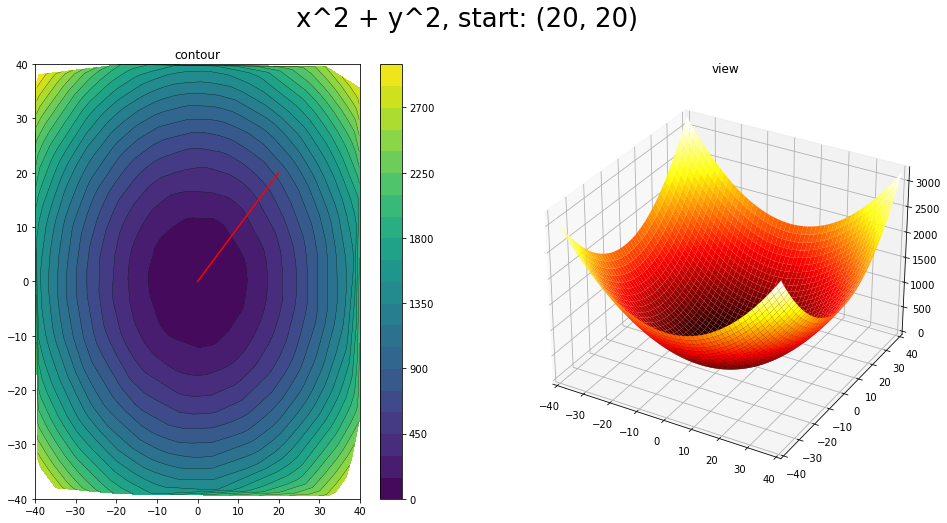

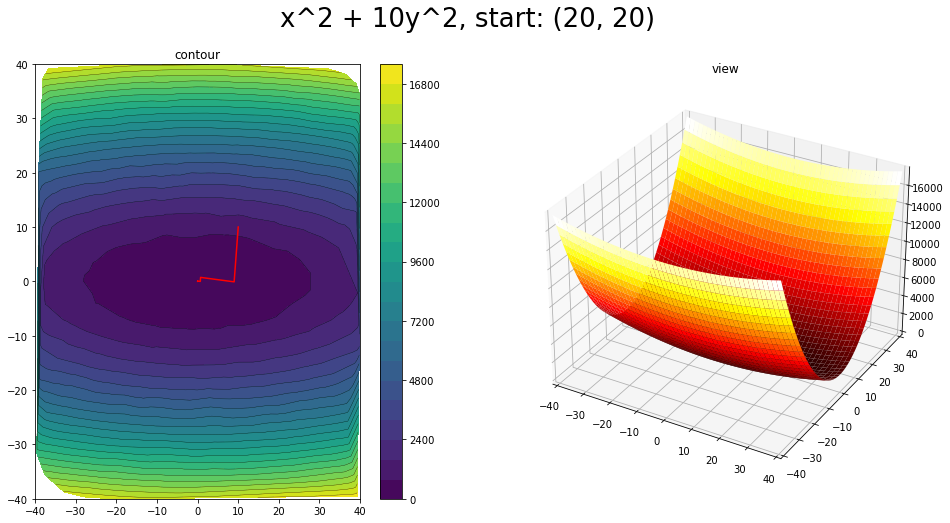

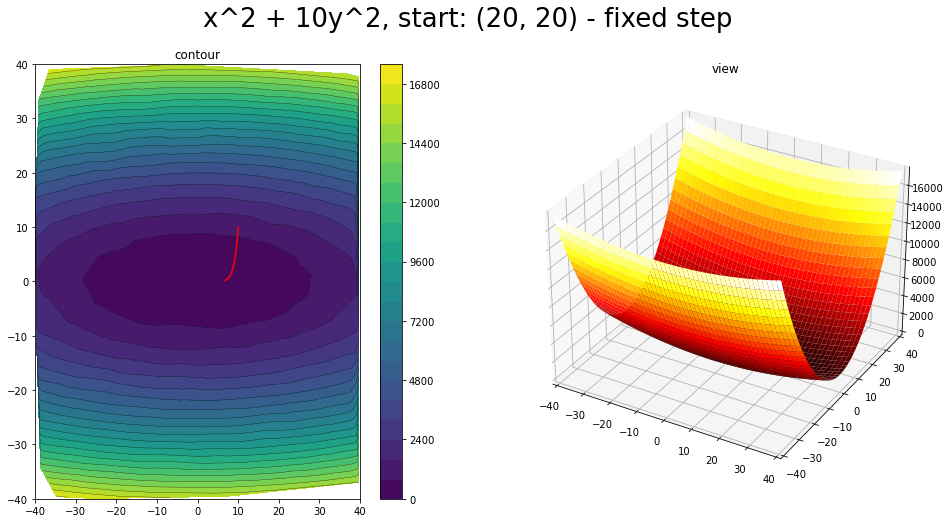

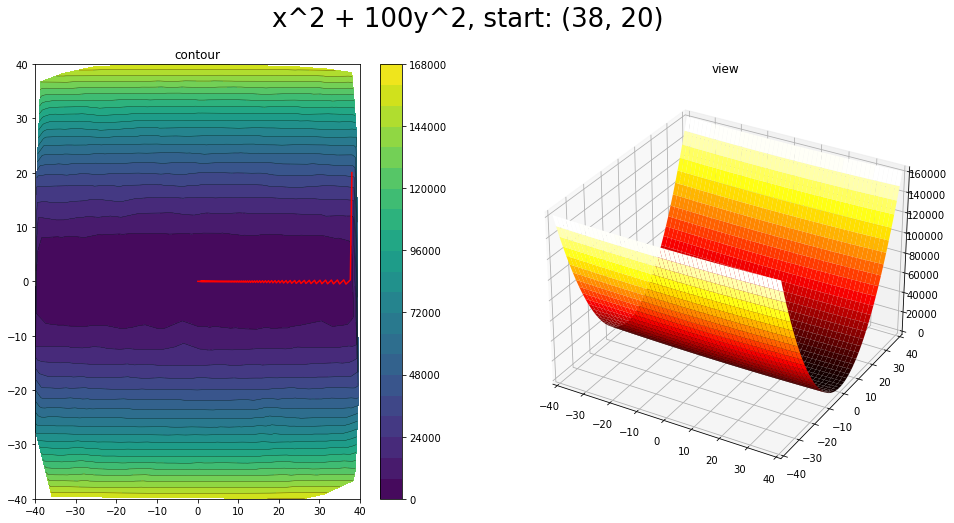

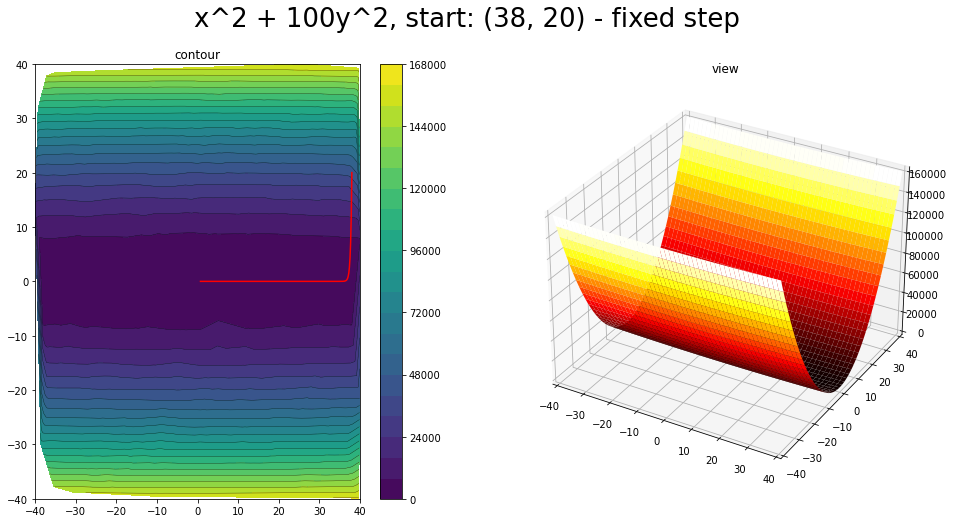

In [14]:
f = lambda x, y: x ** 2 + y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 2 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (20,20))
trajectory("x^2 + y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "fixed", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20) - fixed step", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "dicho", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "fixed", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20) - fixed step", f, -40, 40, -40, 40, g.data)

## Вывод

При решении задачи с большим числом обусловленности, градиентный спуск быстро доходит до дна оврага,
далее медленно двигается к минимуму `зигзагами`

# Часть 4. Число обусловленности

Условие Липшица для градиента: \\(f'(x): \|f'(x) - f'(y)\| <= L \cdot \|x - y\|\\)

Сильно выпуклая функция с константой \\(\Lambda\\): \\(f(x + y) >= f(x) + \langle f'(x), y\rangle + \frac{\Lambda}{2} \cdot \|y^2\|\\)

Число обусловленности: \\(k = \frac{L}{\Lambda}\\)


In [17]:
def gen_random_quad(n, k):
    L = random.uniform(1, 10000)
    La = L / k
    a = [random.uniform(La, L) for i in range(n)]
    a[0] = L
    a[1] = La
    if n == 1:
        return (
            lambda x: a[0] * x ** 2, 
            [
                lambda x: 2 * a[0] * x,
            ]
        )
    elif n == 2:
        return (
            lambda x, y: a[0] * x ** 2 + a[1] * y ** 2,
            [
                lambda x, y: 2 * a[0] * x,
                lambda x, y: 2 * a[1] * y,
            ]
        )
    elif n == 3:
        return (
            lambda x, y, z: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2,
            [
                lambda x, y, z: 2 * a[0] * x,
                lambda x, y, z: 2 * a[1] * y,
                lambda x, y, z: 2 * a[2] * z,
            ]
        )
    elif n == 4:
        return (
            lambda x, y, z, p: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2,
            [
                lambda x, y, z, p: 2 * a[0] * x,
                lambda x, y, z, p: 2 * a[1] * y,
                lambda x, y, z, p: 2 * a[2] * z,
                lambda x, y, z, p: 2 * a[3] * p,
            ]
        )
    elif n == 5:
        return (
            lambda x, y, z, p, t: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2 + a[4] * t ** 2,
            [
                lambda x, y, z, p, t: 2 * a[0] * x,
                lambda x, y, z, p, t: 2 * a[1] * y,
                lambda x, y, z, p, t: 2 * a[2] * z,
                lambda x, y, z, p, t: 2 * a[3] * p,
                lambda x, y, z, p, t: 2 * a[4] * t,
            ]
        )
    elif n == 6:
        return (
            lambda x, y, z, p, t, q: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2 + a[4] * t ** 2 + a[5] * q ** 2,
            [
                lambda x, y, z, p, t, q: 2 * a[0] * x,
                lambda x, y, z, p, t, q: 2 * a[1] * y,
                lambda x, y, z, p, t, q: 2 * a[2] * z,
                lambda x, y, z, p, t, q: 2 * a[3] * p,
                lambda x, y, z, p, t, q: 2 * a[4] * t,
                lambda x, y, z, p, t, q: 2 * a[5] * q,
            ]
        )
    else:
        assert False

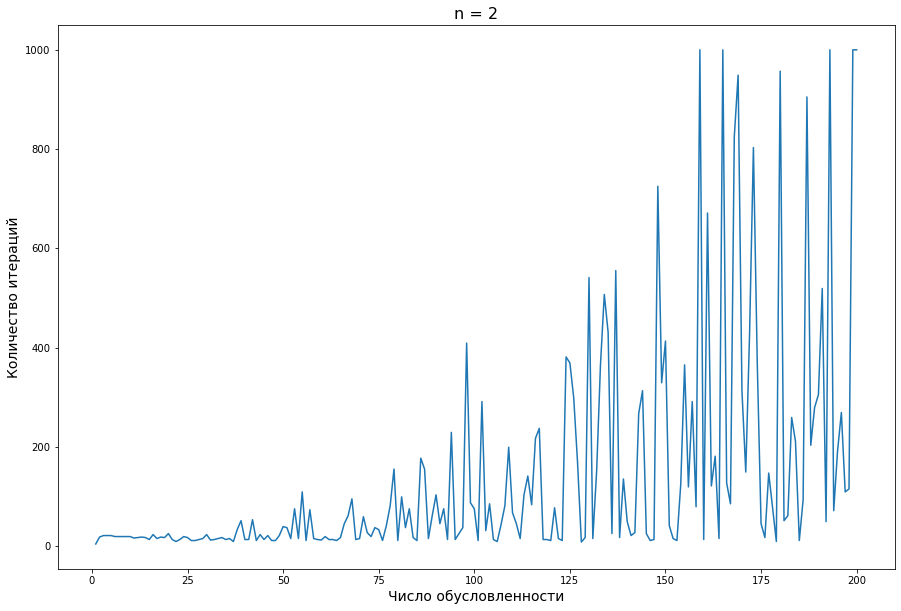

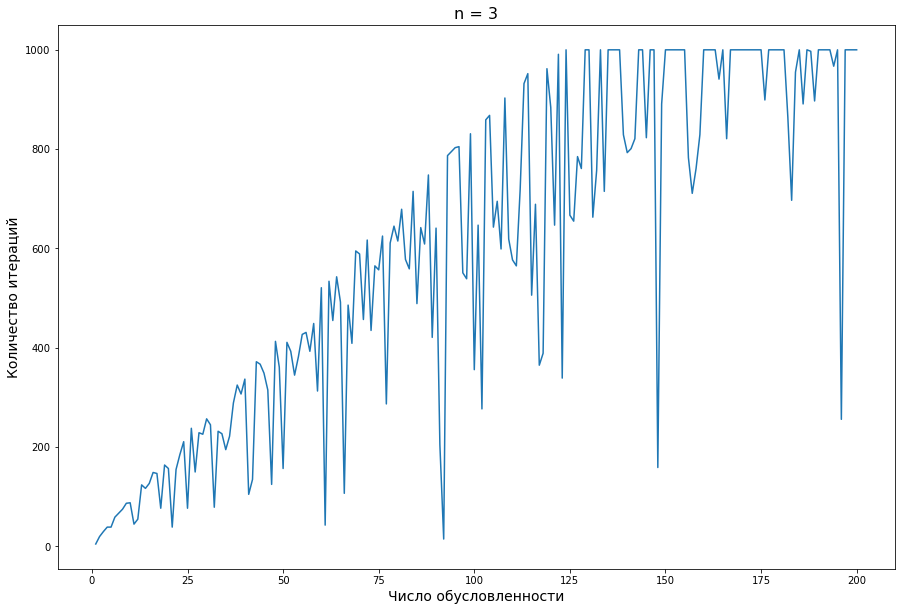

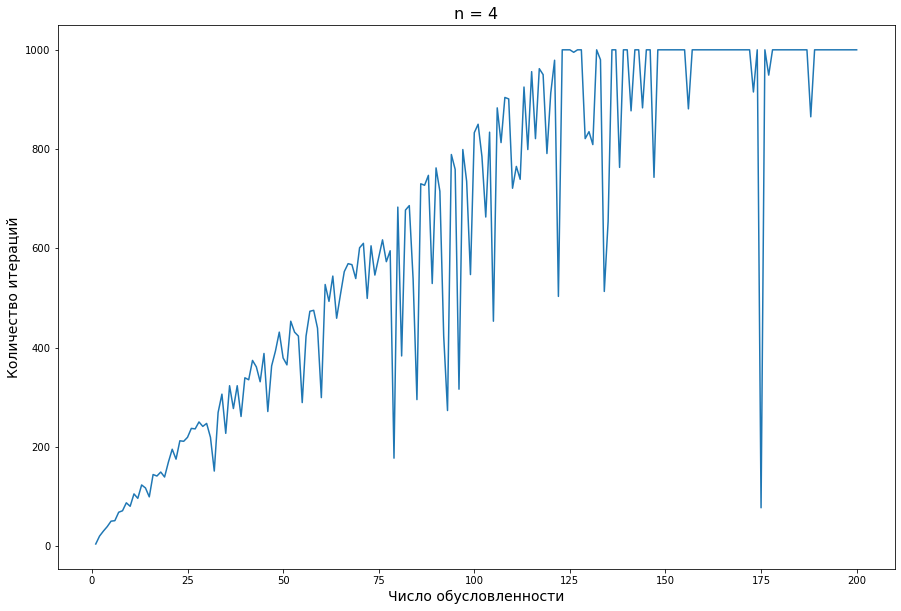

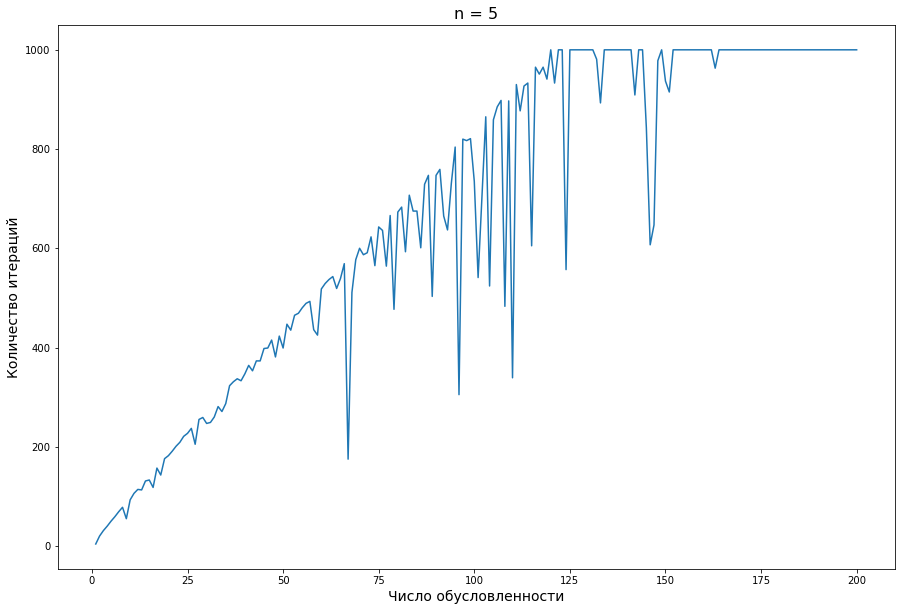

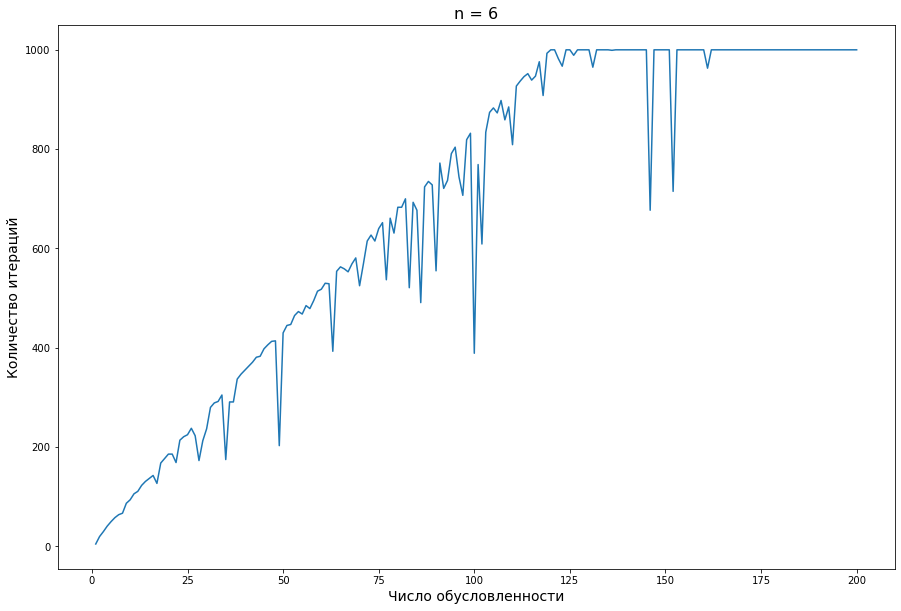

In [18]:
for i in range(1, 6):
    eps = 0.000001
    border = 1000
    fig = plt.figure(figsize=(15,10))
    (x, y) = ([], [])
    for j in range(0, 200):
        q = gen_random_quad(i + 1, j + 1)
        w = FunctionWrapper("", q[0], -math.inf, math.inf, eps, q[1])
        g = grad_descent(w, "golden", tuple([border for some in range(0, i + 1)]))
        x.append(j + 1)
        y.append(g.iterations)
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    plt.title("n = " + str(i + 1), fontsize=16)
    plt.ylabel("Количество итераций", fontsize=14)
    plt.xlabel("Число обусловленности", fontsize=14)
    plt.show()
    print()

## Вывод
1. Размерность пространства практически не влияет на количество итераций
2. При увеличении числа обусловленности растет количество итераций, как и предполагалось